<a href="https://colab.research.google.com/github/hariharan-vs/24ADI003---24BAD030/blob/main/EXP_3_scenario_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hariharan V S - 24BAD030
Degree: 2
MSE: 13.760855128148759
RMSE: 3.7095626599572027
R2: 0.7440623896917349
----------------------
Degree: 3
MSE: 13.813374257439795
RMSE: 3.71663480280748
R2: 0.7430855884449342
----------------------
Degree: 4
MSE: 14.118024021271236
RMSE: 3.7573959095723777
R2: 0.7374194193144635
----------------------


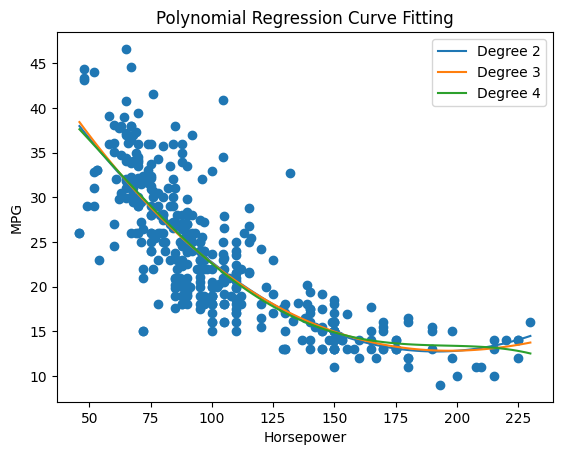

Ridge Regression R2: 0.6715510384765394


/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.32529e-19): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


In [8]:
print('Hariharan V S - 24BAD030')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

zip_path = r"/content/auto-mpg.csv"
df = pd.read_csv(zip_path)

df.replace('?', np.nan, inplace=True)
df['horsepower'] = df['horsepower'].astype(float)
df.fillna(df.mean(numeric_only=True), inplace=True)

X = df[['horsepower']]
y = df['mpg']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train_arr = X_train.values
X_test_arr = X_test.values
X_arr = X.values

degrees = [2, 3, 4]

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_poly_train = poly.fit_transform(X_train_arr)
    X_poly_test = poly.transform(X_test_arr)

    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    y_pred = model.predict(X_poly_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print("Degree:", d)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R2:", r2)
    print("----------------------")

X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

plt.scatter(X, y)

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_poly = poly.fit_transform(X_arr)
    model = LinearRegression()
    model.fit(X_poly, y)
    y_curve = model.predict(poly.transform(X_range))
    plt.plot(X_range, y_curve, label=f"Degree {d}")

plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("Polynomial Regression Curve Fitting")
plt.legend()
plt.show()

poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X_arr)

ridge = Ridge(alpha=10)
ridge.fit(X_poly, y)

print("Ridge Regression R2:", ridge.score(X_poly, y))